# Abstract:

### A key challenge for e-commerce businesses is to analyze the trend in the market to increase their sales. The trend can be easily observed if the companies can group the customers; based on their activity on the e-commerce site. This grouping can be done by applying different criteria like previous orders, mostly searched brands and so on.

# Problem Statement:

### Given the e-commerce data, use k-means clustering algorithm to cluster customers with similar interest.

# Dataset Information:

### The data was collected from a well known e-commerce website over a period of time based on the customer’s search profile.

# Variable Description:

### Cust_ID=Unique numbering for customers
### Gender=Gender of the customer
### Orders=Number of orders placed by each customer in the past

# Remaining 35 features (brands) contains the number of times customers have searched them

<a id='import_packages'></a>
## 1. Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

<a id='Read_Data'></a>
## 2. Read the Data

In [2]:
# read the data
df = pd.read_csv('cust_data.csv', index_col=0)

# print the first five rows of the data
df.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,M,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,F,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,M,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,NaN,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


<a id='data_preparation'></a>
## 3. Understand and Prepare the Data



##  Data Types and Dimensions

In [3]:
# check the data types for variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  27276 non-null  object
 1   Orders                  30000 non-null  int64 
 2   Jordan                  30000 non-null  int64 
 3   Gatorade                30000 non-null  int64 
 4   Samsung                 30000 non-null  int64 
 5   Asus                    30000 non-null  int64 
 6   Udis                    30000 non-null  int64 
 7   Mondelez International  30000 non-null  int64 
 8   Wrangler                30000 non-null  int64 
 9   Vans                    30000 non-null  int64 
 10  Fila                    30000 non-null  int64 
 11  Brooks                  30000 non-null  int64 
 12  H&M                     30000 non-null  int64 
 13  Dairy Queen             30000 non-null  int64 
 14  Fendi                   30000 non-null  int64 
 15  He

In [4]:
# get the shape
print(df.shape)

(30000, 37)


In [5]:
df.dtypes # printing the datatype of data

Gender                    object
Orders                     int64
Jordan                     int64
Gatorade                   int64
Samsung                    int64
Asus                       int64
Udis                       int64
Mondelez International     int64
Wrangler                   int64
Vans                       int64
Fila                       int64
Brooks                     int64
H&M                        int64
Dairy Queen                int64
Fendi                      int64
Hewlett Packard            int64
Pladis                     int64
Asics                      int64
Siemens                    int64
J.M. Smucker               int64
Pop Chips                  int64
Juniper                    int64
Huawei                     int64
Compaq                     int64
IBM                        int64
Burberry                   int64
Mi                         int64
LG                         int64
Dior                       int64
Scabal                     int64
Tommy Hilf

In [6]:
df.isnull().sum()  # checking null values

Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Hollister                    0
Forever 

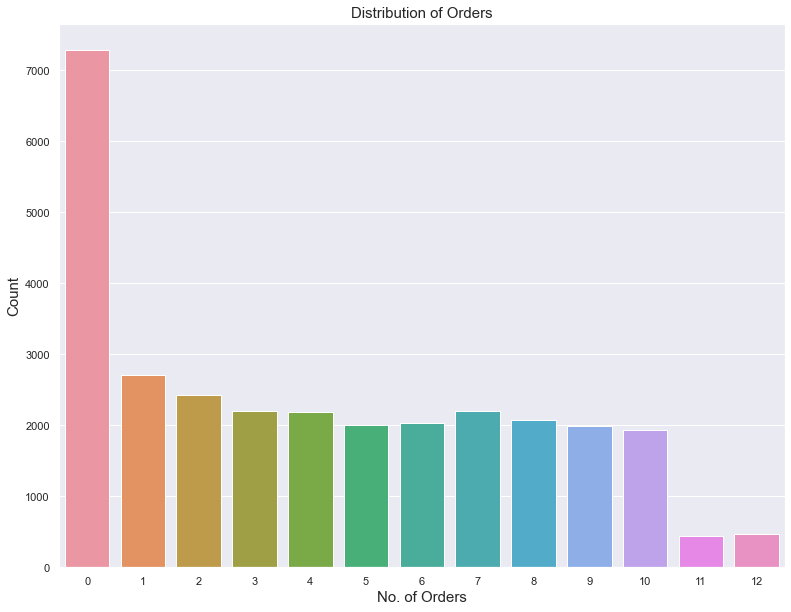

In [8]:
# 'countplot' to plot barplot for orders
plt.figure(figsize=(13, 10))
sns.countplot(data = df, x = 'Orders')
plt.title('Distribution of Orders', fontsize = 15)
plt.xlabel('No. of Orders', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

Most of the customers have no past orders 

**Distribution of gender of the customer**



Text(0.5, 1.0, 'distribution of orders by gender')

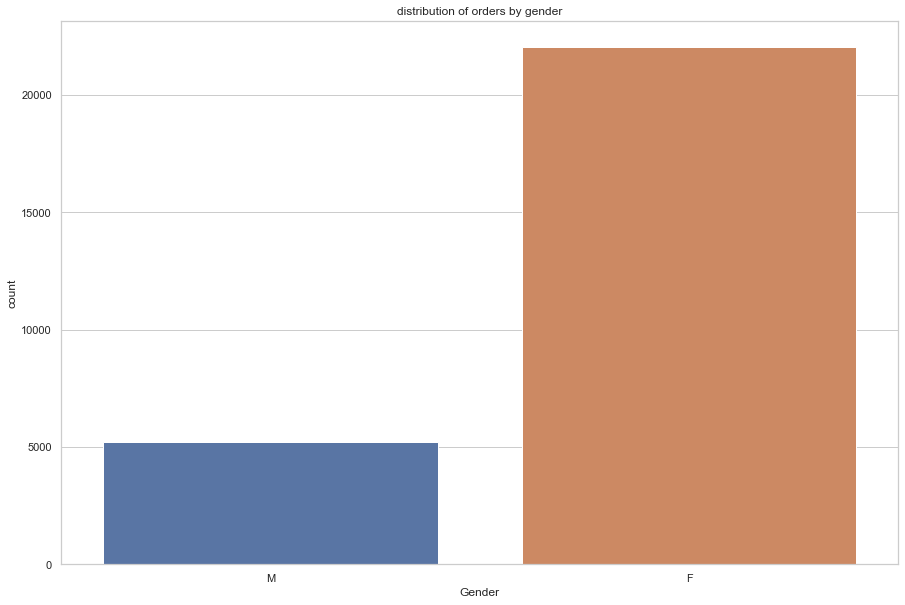

In [51]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Gender",data=df)
plt.title("distribution of orders by gender")
#distribution of orders placed by gender

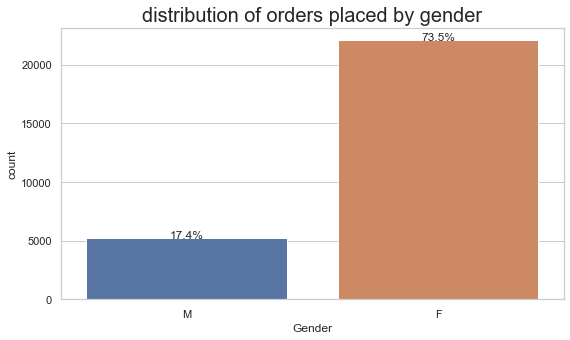

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(9,5))
total = float(len(df))
ax = sns.countplot(x="Gender", data=df)
plt.title('distribution of orders placed by gender', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()-0.4
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()
#GETTING THE COUNT PLOT IN PERCENTAGE

**There are more female customers in the data than the male customers.
It can be seen that the variable 'Gender' has lesser observations (percent-wise only 90.92% observations) than the total number of observations. This inconsistency is because of the existence of missing values**

In [12]:
df.describe()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,0.094267,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,0.531592,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,15.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


The above output illustrates the summary statistics of the numeric variable.
The customers have placed 4 orders on an average with minimum zero orders and maximum of 12.
From the summary output, it can be seen that the considered dataset is sparse; 
since, for all the variables with brand searches, 75% of the observations are 0

In [14]:
# summary of the categorical variables
df.describe(include = object)

,Gender
count,27276
unique,2
top,F
freq,22054


**The summary contains information about the total number of observations, number of unique classes, the most occurring class and frequency of the same.
It can be seen that the mode of the variable 'Gender' is F with 22054 observations**


## Treating Missing values:
If the missing values are not handled properly we may end up drawing an inaccurate inference about the data. Due to improper handling, the result obtained will differ from the ones where the missing values are present.


In [15]:
percent_missing1 = df.isnull().sum()
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing1':percent_missing1 ,
                                 'percent_missing': percent_missing})
missing_value_df
#DISPLAYIN THE MISSING VALUES AND ITS PERCENTAGES

,percent_missing1,percent_missing
Gender,2724,9.08
Orders,0,0.00
Jordan,0,0.00
Gatorade,0,0.00
Samsung,0,0.00
Asus,0,0.00
Udis,0,0.00
Mondelez International,0,0.00
Wrangler,0,0.00
Vans,0,0.00


Only the variable 'Gender' has 9% of missing values

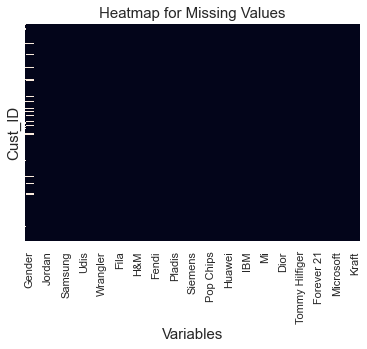

In [17]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
plt.title('Heatmap for Missing Values', fontsize = 15)
plt.xlabel('Variables', fontsize = 15)
plt.ylabel('Cust_ID', fontsize = 15)

plt.show()

#### Replace missing values in 'Gender'

'Gender' is a categorical variable with categories, 'M' and 'F'. We have 2724 customers whose gender is not known to us. To deal with this, we perform dummy encoding for the variable  

In [19]:
# create dummies against 'gender'
data = pd.get_dummies(df,columns=['Gender'])     

# head() to display top five rows
data.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,10,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,0,0


In [20]:
# check the dimensions after dummy encoding
data.shape

(30000, 38)

The customer for which both the columns have '0' value indicates that the gender is not known

In [21]:
# recheck the null values
data.isnull().sum()

Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft                 0
Jiffy mix                 0
Kraft               


##  Visualization


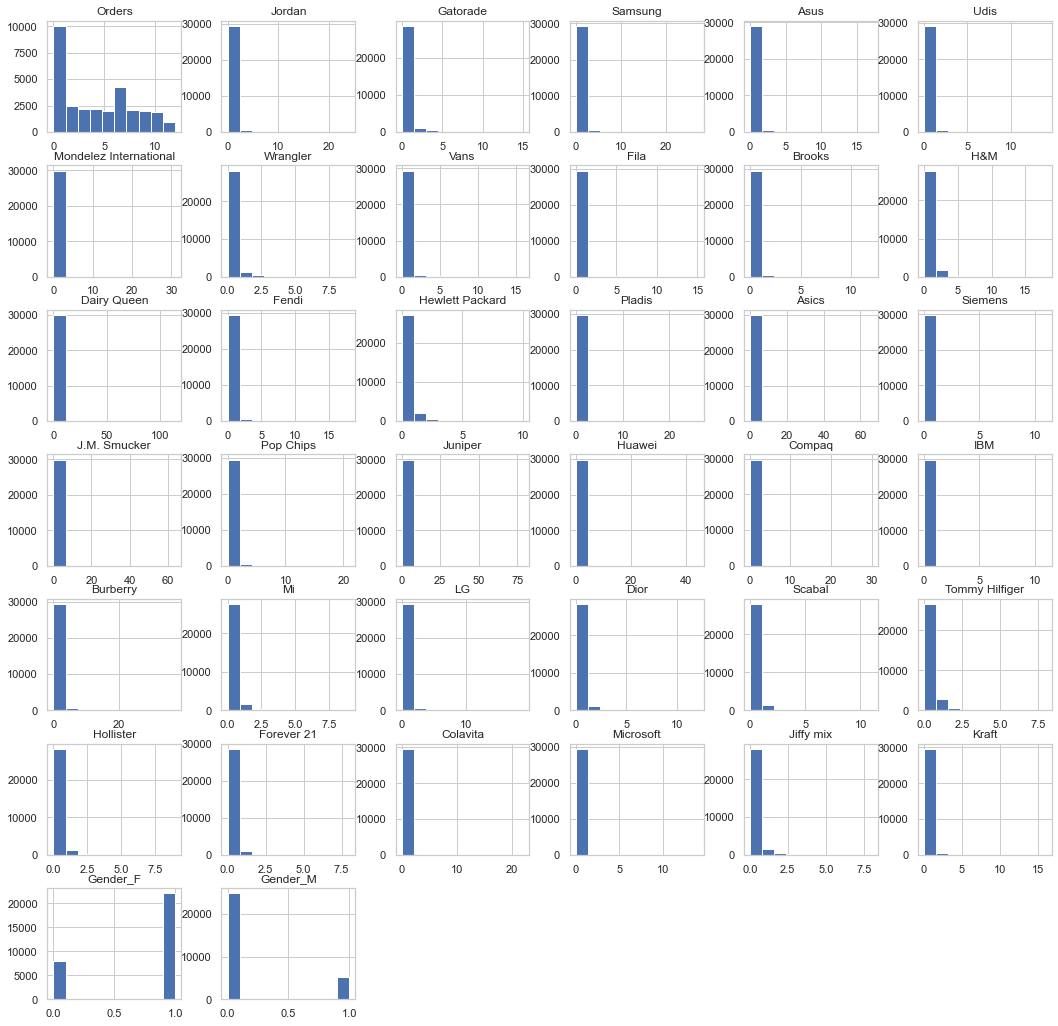

In [22]:
fig = data.hist(figsize = (18,18))



# K-means Clustering


Centroid-based clustering algorithms cluster the data into non-hierarchical clusters. Such algorithms are efficient but sensitive to initial conditions and outliers. K-means is the most widely-used centroid-based clustering algorithm


##  Prepare the Data

Feature scaling is used to transform all the variables in the same range. If the variables are not in the same range, then the variable with higher values can dominate our final result. 

The two most discussed scaling methods are normalization and standardization. 



We consider only the brand names to segment the customers. Thus, drop the variables 'Orders', 'Gender_F', 'Gender_M' and scale the remaining variables

In [23]:
# 'features' contain only the brand names
features = data.drop(['Orders', 'Gender_F', 'Gender_M'], axis=1)

# head() to display top five rows
features.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


**Scaling the data**

In [24]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler().fit(features)       

# scale the 'features' data
features = scale.transform(features)                

In [25]:
# create a dataframe of the scaled features 
features_scaled = pd.DataFrame( features, columns= data.columns[0:35])

# head() to display top five rows
features_scaled.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix
0,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151


<a id='model_k'></a>
## Build a Model with Multiple K


**We build our models using the silhouette score method. The silhouette is a method of interpretation and validation of consistency within clusters of data**

**We do not know how many clusters give the most useful results. So, we create the clusters varying K, from 4 to 8 and then decide the optimum number of clusters (K) with the help of the silhouette score**

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# create a list for different values of K
n_clusters = [4, 5, 6, 7, 8]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters :
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(features_scaled)
    
    score = silhouette_score(features_scaled, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 4, silhouette score is 0.28882936660558056)
For n_clusters = 5, silhouette score is 0.27345077326493045)
For n_clusters = 6, silhouette score is 0.21945733520641614)
For n_clusters = 7, silhouette score is 0.20381188273552986)
For n_clusters = 8, silhouette score is 0.19969011593446037)


### elbow method

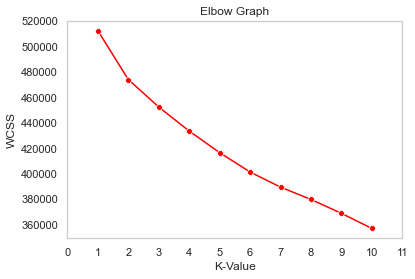

In [28]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state = 42)
    kmeans.fit(df.iloc[:,3:])
    wcss.append(kmeans.inertia_)
plt.grid()
sns.lineplot(x=range(1,11), y=wcss, color="red", marker ="8")
plt.xlabel("K-Value")
plt.xticks(np.arange(11.5))
plt.ylabel("WCSS")
plt.title("Elbow Graph")
plt.show()

In [29]:
# building a K-Means model for K = 4
model = KMeans(n_clusters= 4, random_state= 10)

# fit the model
model.fit(features_scaled)

KMeans(n_clusters=4, random_state=10)

**Now, explore these 4 clusters to gain some insights about the clusters**


# Retrieve the Clusters



**As we have built the 4 clusters, now we want to know which customers belong to which cluster. 'model.labels_' can give the cluster number in which the customer belongs**

In [30]:
data_output = data.copy(deep = True)
# add a column 'Cluster' in the data giving cluster number corresponding to each observation
data_output['Cluster'] = model.labels_

# head() to display top five rows
data_output.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M,Cluster
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
3,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


**We have added a column 'cluster' in the dataframe describing the cluster number for each observation**

##### Check the size of each cluster

In [31]:
# 'return_counts = True' gives the number observation in each cluster
np.unique(model.labels_, return_counts=True)                

(array([0, 1, 2, 3]), array([ 1255, 22772,  5272,   701], dtype=int64))

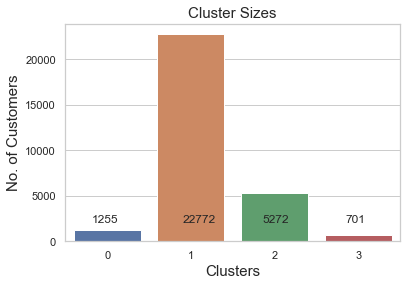

In [32]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= data_output, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Customers', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.18, y =2000, s = np.unique(model.labels_, return_counts=True)[1][0])
plt.text(x = 0.9, y =2000, s = np.unique(model.labels_, return_counts=True)[1][1])
plt.text(x = 1.85, y =2000, s = np.unique(model.labels_, return_counts=True)[1][2])
plt.text(x = 2.85, y =2000, s = np.unique(model.labels_, return_counts=True)[1][3])

plt.show()

#### Cluster Centers

The cluster centers can give information about the variables belonging to the clusters


In [33]:
# form a dataframe containing cluster centers
# 'cluster_centers_' returns the co-ordinates of a cluster center 
centers = pd.DataFrame(model.cluster_centers_, columns=  data_output.columns[1:36])      

In [34]:
# head() to display top five rows
centers.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0.446911,0.464653,0.233811,0.158847,0.102969,0.253960,0.317851,0.385554,0.095476,0.808415,...,1.396351,0.631866,0.290554,1.137030,0.335733,0.417016,1.391345,0.806428,1.575620,1.922702
1,-0.158476,-0.157536,-0.084381,-0.116934,-0.121153,-0.087155,-0.113422,-0.076786,-0.039016,-0.123452,...,-0.088160,-0.161581,-0.191656,-0.142253,-0.148547,-0.141765,-0.076493,-0.068999,-0.079321,-0.082740
2,0.594856,0.569990,0.324250,0.474459,0.511302,0.314878,0.430609,0.257115,0.145073,0.358618,...,0.061868,0.565501,0.770176,0.350728,0.586942,0.535840,0.003689,0.104907,-0.020615,-0.087260
3,-0.116054,0.008321,-0.110823,-0.046447,-0.085908,0.013628,-0.116023,-0.125255,0.007833,-0.127840,...,-0.099359,-0.125881,-0.074137,-0.045926,-0.180266,-0.162539,-0.032771,0.010947,-0.088290,-0.098193


**Now, extract the variables in each of the clusters and try to name each of the cluster based on the variables**


# Clusters Analysis



##  Analysis of Cluster_1


1. Check the size of a cluster
2. Sort the variables belonging to the cluster
3. Compute the statistical summary for observations in the cluster

Sort all the variables based on value for the cluster center (i.e., the variable with the highest value of the cluster center will be on top of the sorted list) and store the first ten variables as a list

In [35]:
# sort the variables based on cluster centers
cluster_1 = sorted(zip(list(centers.iloc[0,:]), list(centers.columns)), reverse = True)[:10]     

**Check size of the cluster**

In [36]:
# size of a cluster_1
np.unique(model.labels_, return_counts=True)[1][0]

1255

**2. Sort variables belonging to the cluster**

In [37]:
# retrieve the top 10 variables present in the cluster
cluster1_var = pd.DataFrame(cluster_1)[1]
cluster1_var

0            Pladis
1          Burberry
2             Kraft
3       Dairy Queen
4         Jiffy mix
5                LG
6          Colavita
7         Pop Chips
8      J.M. Smucker
9    Tommy Hilfiger
Name: 1, dtype: object

**Compute the statistical summary for observations in the cluster**

In [38]:
# get summary for observations in the cluster
# consider the number of orders and customer gender for cluster analysis
data_output[['Orders', 'Gender_F', 'Gender_M', 'Cluster']][data_output.Cluster == 0].describe()

,Orders,Gender_F,Gender_M,Cluster
count,1255.000000,1255.000000,1255.000000,1255.0
mean,4.146614,0.821514,0.120319,0.0
std,3.630131,0.383074,0.325464,0.0
min,0.000000,0.000000,0.000000,0.0
25%,1.000000,1.000000,0.000000,0.0
50%,4.000000,1.000000,0.000000,0.0
75%,7.000000,1.000000,0.000000,0.0
max,12.000000,1.000000,1.000000,0.0


The proportion of both male and female customers is proportionate in this cluster as compared to the overall gender proportion in the dataset

 
## Analysis of Cluster_2

In [39]:
# sort the variables based on cluster centers
cluster_2 = sorted(zip(list(centers.iloc[1,:]), list(centers.columns)), reverse = True)[:10]     

**1. Check the size of a cluster**

In [40]:
# size of a cluster_2
np.unique(model.labels_, return_counts=True)[1][1]

22772

561 customers belong to cluster_2. This is the smallest cluster

**2. Sort variables belonging to the cluster**

In [41]:
# retrieve the top 10 variables present in the cluster
cluster2_var = pd.DataFrame(cluster_2)[1]
cluster2_var        

0                IBM
1               Fila
2    Hewlett Packard
3             Compaq
4              Fendi
5          Microsoft
6           Colavita
7               Vans
8          Jiffy mix
9              Kraft
Name: 1, dtype: object

**3. Compute the statistical summary for observations in the cluster**

In [42]:
# get summary for observations in the cluster
# consider the number of orders and customer gender for cluster analysis
data_output[['Orders', 'Gender_F', 'Gender_M', 'Cluster']][data_output.Cluster == 1].describe()

,Orders,Gender_F,Gender_M,Cluster
count,22772.000000,22772.000000,22772.000000,22772.0
mean,4.096829,0.705691,0.195547,1.0
std,3.606516,0.455741,0.396630,0.0
min,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,1.0
50%,4.000000,1.000000,0.000000,1.0
75%,7.000000,1.000000,0.000000,1.0
max,12.000000,1.000000,1.000000,1.0


This cluster contains highest male population among all the clusters. But, there is high deviation in both the genders

<a id='cluster_3'></a>
## 6.3 Analysis of Cluster_3

In [43]:
# sort the variables based on cluster centers
cluster_3 = sorted(zip(list(centers.iloc[2,:]), list(centers.columns)), reverse = True)[:10]   

**1. Check the size of a cluster**

In [44]:
# size of cluster_3
np.unique(model.labels_, return_counts=True)[1][2]

5272

**2. Sort variables belonging to the cluster**

In [45]:
# retrieve the top 10 variables present in the cluster
cluster3_var = pd.DataFrame(cluster_3)[1]
cluster3_var             

0        Scabal
1        Jordan
2     Hollister
3      Gatorade
4          Dior
5           H&M
6    Forever 21
7          Udis
8        Huawei
9          Asus
Name: 1, dtype: object

**3. Compute the statistical summary for observations in the cluster**

In [46]:
# get summary for observations in the cluster
# consider the number of orders and customer gender for cluster analysis
data_output[['Orders', 'Gender_F', 'Gender_M', 'Cluster']][data_output.Cluster == 2].describe()

,Orders,Gender_F,Gender_M,Cluster
count,5272.000000,5272.000000,5272.000000,5272.0
mean,4.459598,0.845220,0.089340,2.0
std,3.503566,0.361729,0.285261,0.0
min,0.000000,0.000000,0.000000,2.0
25%,1.000000,1.000000,0.000000,2.0
50%,4.000000,1.000000,0.000000,2.0
75%,7.000000,1.000000,0.000000,2.0
max,12.000000,1.000000,1.000000,2.0



## Analysis of Cluster_4

In [47]:
# sort the variables based on cluster centers
cluster_4 = sorted(zip(list(centers.iloc[3,:]), list(centers.columns)), reverse=True)[:10]   

**1. Check the size of a cluster**

In [48]:
# size of cluster_4
np.unique(model.labels_, return_counts=True)[1][3]

701

**2. Sort variables belonging to the cluster**

In [49]:
# retrieve the top 10 variables present in the cluster
cluster4_var = pd.DataFrame(cluster_4)[1]
cluster4_var             

0                   Siemens
1                     Asics
2              J.M. Smucker
3                 Pop Chips
4                   Juniper
5                    Huawei
6                        Mi
7                    Compaq
8    Mondelez International
9                 Microsoft
Name: 1, dtype: object

**3. Compute the statistical summary for observations in the cluster**

In [50]:
# get summary for observations in the cluster
# consider the number of orders and customer gender for cluster analysis
data_output[['Orders', 'Gender_F', 'Gender_M', 'Cluster']][data_output.Cluster==3].describe()

,Orders,Gender_F,Gender_M,Cluster
count,701.000000,701.000000,701.000000,701.0
mean,4.402282,0.708987,0.209700,3.0
std,3.522693,0.454554,0.407385,0.0
min,0.000000,0.000000,0.000000,3.0
25%,1.000000,0.000000,0.000000,3.0
50%,4.000000,1.000000,0.000000,3.0
75%,7.000000,1.000000,0.000000,3.0
max,12.000000,1.000000,1.000000,3.0



## Conclusion

**In this case study, we have grouped the customers' dataset into 4 clusters based on the brands they have searched on e-commerce sites. We have used the silhouette score method to find the optimum number of clusters and decided k = 4 as the best pick after analyzing the silhouette score.**

**After applying the K-means algorithm with an optimized number of clusters, we segment the customers under 'Grocery', 'Apparels', 'Electronics', and 'Basket class' categories. These clusters give information about the interest of the customer in the different brands. This type of segmentation can help the e-commerce companies, to know the customer's choices and they can provide more accurate recommendations to the customers**